## Project Overview
Weight bias substantially influence human social perception and judgements. Overweight people are always judged with negative impressions, such as less attractive or competent. Since weight changes impressions, my model intends to using established weight parameters for 1004 facical images from the lab's data and scores for their perceived social attributes in human perception to predict how people perceive one face based on the weight. 
In this project, I intend to use supervised regression model, using weight as traning data to predict the score of certain social attributes. 
(To clarify, I originally discussed with Prof.Wang and TA Yingzi to predict weight using social attributes scores, but this does not make sense when I look into the lab data that describes the actual weight of the face. Thus, I will do it vice versa, to use weight data in attributes prediction.)

## Exploratory Data Analysis 

- **Part-1: Data overview**
    > check the #samples, #attributes <br>
    > attribute types <br>
    
- **Part-2: Data cleaning**
    > organize attributes into appripriate data types (e.g., numerical, categorical, datatime, text, image, ...) <br>
    > missing value and outlier detection <br>
    
- **Part-3: Data transformation**
    > normalize numerical data <br>
    
- **Part-4: Feature engineering**
    > directly use numerical data

- **Part-5: Additional analysis**
    > colinearty check <br>

### Dataset shared link
- https://github.com/jcpeterson/omi/blob/main/attribute_means.csv
- https://github.com/yihanww/MACS30100/blob/main/project/dlatents.npy

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data overview

In [88]:
# read features data from file to a pandas dataframe
features_df = pd.read_csv('./attribute_means.csv') 

In [89]:
# read actual weight data from file to a pandas dataframe
weight = np.load("dlatents.npy")

In [90]:
# check the shape of the data frame: row: #samples (short for number of samples), column: #attributes (short for number of attributes)
features_df.shape

(1004, 35)

In [91]:
# get an overview of the top-n rows/samples
features_df.head()

,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,happy,...,hispanic,islander,native,black,white,looks-like-you,gay,electable,godly,outdoors
0,1,43.673077,46.552632,79.771429,55.405405,50.404255,86.891892,38.119048,66.736842,18.970588,...,18.828571,12.470588,13.925926,5.105263,92.970588,31.428571,20.523810,61.486486,53.439024,83.925000
1,2,65.000000,59.750000,48.666667,57.891892,31.300000,12.560976,48.275000,49.209302,75.771429,...,70.325000,63.236842,54.564516,72.735294,4.880952,13.465116,31.414634,66.184211,62.809524,57.513514
2,3,37.010526,36.000000,65.428571,65.057143,51.745098,74.789474,44.790698,48.666667,23.135135,...,44.375000,27.108108,33.898305,3.972222,68.787879,18.363636,46.024390,70.804878,55.921053,11.292683
3,4,64.053191,65.500000,47.194444,54.700000,24.777778,9.526316,32.375000,44.024390,59.526316,...,61.666667,60.352941,49.824561,72.552632,3.315789,10.500000,20.365854,57.179487,62.051282,16.560976
4,5,69.577320,50.702703,56.257143,61.527778,44.534884,14.650000,40.250000,70.184211,82.600000,...,14.162162,15.121212,10.910714,3.702703,88.842105,19.000000,21.783784,70.888889,71.833333,20.777778


In [92]:
# check the shape of the data frame: row: #samples (short for number of samples), column: #attributes (short for number of attributes)
weight.shape

(3039, 512)

In [93]:
# I only need the first 1004 rows because the features are rated based on these 1004 stimuli
weight = weight[:1004]
weight

array([[ 0.01608254, -0.20062245, -0.29112384, ..., -0.17773119,
        -0.06716575, -0.07059635],
       [-0.00166759, -0.02775493, -0.18739995, ..., -0.20235142,
        -0.09695578, -0.34975681],
       [-0.20952941,  0.01885662,  0.61291254, ...,  0.53577298,
         0.41925639,  0.91552621],
       ...,
       [-0.03168365, -0.01862339, -0.02364639, ..., -0.14452291,
        -0.08473014,  0.2162483 ],
       [ 0.1840674 ,  0.28043327, -0.20540014, ..., -0.08562395,
        -0.17729175, -0.00313852],
       [-0.02309644,  0.17632581, -0.09819295, ..., -0.31139478,
        -0.15932131, -0.2066813 ]])

### Data cleaning

#### check missing values

In [94]:
null_sum = features_df.isnull().sum()
null_sum

stimulus          0
trustworthy       0
attractive        0
dominant          0
smart             0
age               0
gender            0
weight            0
typical           0
happy             0
familiar          0
outgoing          0
memorable         0
well-groomed      0
long-haired       0
smug              0
dorky             0
skin-color        0
hair-color        0
alert             0
cute              0
privileged        0
liberal           0
asian             0
middle-eastern    0
hispanic          0
islander          0
native            0
black             0
white             0
looks-like-you    0
gay               0
electable         0
godly             0
outdoors          0
dtype: int64

No missing values need to be dropped.

#### organize columns into different data types
The .dtype attribute shows that the current data type for all columns are "int64", I don't have to convert the columns into different data types.   

#### process numerical data

In [95]:
# get the column names
column_names = features_df.columns
column_names_list = features_df.columns.tolist()

# print the column names
print(column_names)
print(column_names_list)

Index(['stimulus', 'trustworthy', 'attractive', 'dominant', 'smart', 'age',
       'gender', 'weight', 'typical', 'happy', 'familiar', 'outgoing',
       'memorable', 'well-groomed', 'long-haired', 'smug', 'dorky',
       'skin-color', 'hair-color', 'alert', 'cute', 'privileged', 'liberal',
       'asian', 'middle-eastern', 'hispanic', 'islander', 'native', 'black',
       'white', 'looks-like-you', 'gay', 'electable', 'godly', 'outdoors'],
      dtype='object')
['stimulus', 'trustworthy', 'attractive', 'dominant', 'smart', 'age', 'gender', 'weight', 'typical', 'happy', 'familiar', 'outgoing', 'memorable', 'well-groomed', 'long-haired', 'smug', 'dorky', 'skin-color', 'hair-color', 'alert', 'cute', 'privileged', 'liberal', 'asian', 'middle-eastern', 'hispanic', 'islander', 'native', 'black', 'white', 'looks-like-you', 'gay', 'electable', 'godly', 'outdoors']


In [96]:
num_col = ['stimulus', 'trustworthy', 'attractive', 'dominant', 'smart', 'age',
       'gender', 'weight', 'typical', 'happy', 'familiar', 'outgoing',
       'memorable', 'well-groomed', 'long-haired', 'smug', 'dorky',
       'skin-color', 'hair-color', 'alert', 'cute', 'privileged', 'liberal',
       'asian', 'middle-eastern', 'hispanic', 'islander', 'native', 'black',
       'white', 'looks-like-you', 'gay', 'electable', 'godly', 'outdoors']

Convert the numerical columns to the "float" data type 

In [97]:
features_df[num_col] = features_df[num_col].astype('float')
features_df[num_col]

,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,happy,...,hispanic,islander,native,black,white,looks-like-you,gay,electable,godly,outdoors
0,1.0,43.673077,46.552632,79.771429,55.405405,50.404255,86.891892,38.119048,66.736842,18.970588,...,18.828571,12.470588,13.925926,5.105263,92.970588,31.428571,20.523810,61.486486,53.439024,83.925000
1,2.0,65.000000,59.750000,48.666667,57.891892,31.300000,12.560976,48.275000,49.209302,75.771429,...,70.325000,63.236842,54.564516,72.735294,4.880952,13.465116,31.414634,66.184211,62.809524,57.513514
2,3.0,37.010526,36.000000,65.428571,65.057143,51.745098,74.789474,44.790698,48.666667,23.135135,...,44.375000,27.108108,33.898305,3.972222,68.787879,18.363636,46.024390,70.804878,55.921053,11.292683
3,4.0,64.053191,65.500000,47.194444,54.700000,24.777778,9.526316,32.375000,44.024390,59.526316,...,61.666667,60.352941,49.824561,72.552632,3.315789,10.500000,20.365854,57.179487,62.051282,16.560976
4,5.0,69.577320,50.702703,56.257143,61.527778,44.534884,14.650000,40.250000,70.184211,82.600000,...,14.162162,15.121212,10.910714,3.702703,88.842105,19.000000,21.783784,70.888889,71.833333,20.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1000.0,51.678161,45.970588,59.171429,51.925000,40.142857,86.257143,53.235294,73.714286,53.647059,...,44.146341,15.228571,19.256410,6.647059,81.857143,26.371429,29.055556,57.975000,60.757576,14.923077
1000,1001.0,76.918605,66.928571,37.105263,53.864865,16.294118,11.200000,44.138889,57.228571,76.714286,...,51.600000,57.738095,45.717949,10.289474,58.500000,23.085714,18.783784,27.243902,68.800000,87.636364
1001,1002.0,50.318182,44.902439,63.578947,64.736842,37.969697,82.297297,51.333333,52.891892,34.450000,...,58.121212,77.078947,60.200000,18.500000,13.351351,16.515152,24.378378,63.871795,49.900000,12.914286
1002,1003.0,55.551724,69.842105,54.625000,48.250000,26.029412,8.307692,41.358974,54.085714,41.538462,...,68.000000,51.944444,44.375000,11.685714,47.027027,22.230769,25.400000,56.852941,63.435897,17.714286


In [98]:
# the following columns now all have the numerical data types
features_df[num_col].dtypes

stimulus          float64
trustworthy       float64
attractive        float64
dominant          float64
smart             float64
age               float64
gender            float64
weight            float64
typical           float64
happy             float64
familiar          float64
outgoing          float64
memorable         float64
well-groomed      float64
long-haired       float64
smug              float64
dorky             float64
skin-color        float64
hair-color        float64
alert             float64
cute              float64
privileged        float64
liberal           float64
asian             float64
middle-eastern    float64
hispanic          float64
islander          float64
native            float64
black             float64
white             float64
looks-like-you    float64
gay               float64
electable         float64
godly             float64
outdoors          float64
dtype: object

Since the actual weight data is my target data, I have to drop certain columns that are not needed to train the model : "stimulus" and "weight"

In [99]:
features_df = features_df.drop(['stimulus', 'weight'], axis = 1)

In [100]:
# check the shape of dataframe after dropping
features_df.shape

(1004, 33)

Since I only have 1004 rows in total, TA Yingzi suggested me not to drop outliers at this point. 

### Data transformation


#### Normalize numerical data

<Axes: xlabel='trustworthy', ylabel='Count'>

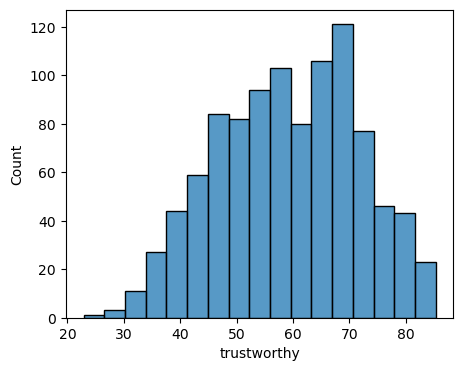

In [101]:
# take "trustworthy" as test
# check the distribution of the "trustworthy" (before normalization)
sns.histplot(features_df['trustworthy'])

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features_df['trustworthy'] = scaler.fit_transform(features_df[['trustworthy']].values)

<Axes: xlabel='trustworthy', ylabel='Count'>

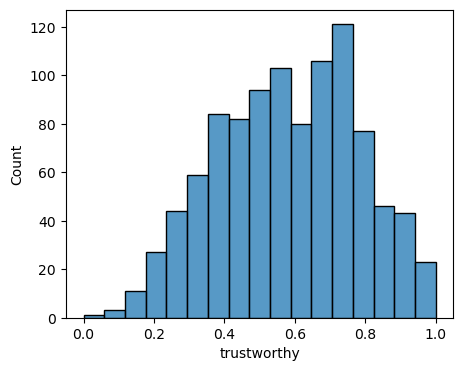

In [103]:
# check the distribution of the "trustworthy" (after normalization)
sns.histplot(features_df['trustworthy'])

Create a for loop to do normalization for each column of the df


In [104]:
# create the MinMaxScaler object
scaler = MinMaxScaler()

# loop through each column and scale
for column in features_df.columns:
    features_df[column] = scaler.fit_transform(features_df[[column]])

Check if the scaler successfully transformed other columns

<Axes: xlabel='smart', ylabel='Count'>

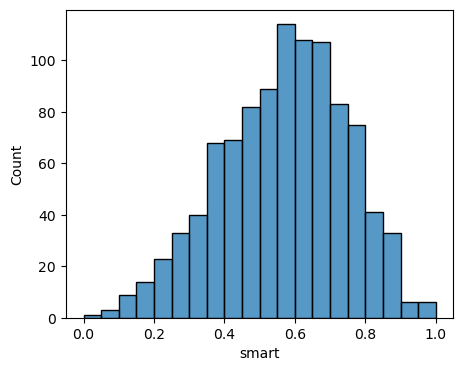

In [105]:
# check the distribution of the "smart" (after normalization)
sns.histplot(features_df['smart'])

Normalize "weight" array

In [106]:
normalized_weight = scaler.fit_transform(weight)

Check if the "weight" array has been normalized

In [107]:
normalized_weight = pd.DataFrame(normalized_weight)
normalized_weight

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.201823,0.207263,0.131960,0.197362,0.212057,0.232269,0.217988,0.156408,0.493629,0.284529,...,0.251307,0.180764,0.286210,0.188048,0.143103,0.328061,0.477883,0.167319,0.209895,0.144598
1,0.192696,0.278254,0.159255,0.431848,0.273513,0.182764,0.226668,0.241939,0.362119,0.237364,...,0.024211,0.397425,0.191389,0.182948,0.131782,0.175761,0.141204,0.156109,0.197948,0.057804
2,0.085817,0.297397,0.369857,0.293657,0.156337,0.120770,0.086942,0.072899,0.448529,0.220386,...,0.210379,0.243063,0.064339,0.398021,0.209235,0.173963,0.184622,0.492171,0.404965,0.451193
3,0.125014,0.196667,0.143117,0.211595,0.200402,0.220020,0.198413,0.200367,0.271753,0.216442,...,0.161890,0.488544,0.166118,0.353496,0.200162,0.112506,0.499833,0.128121,0.139557,0.084880
4,0.107033,0.237456,0.146391,0.180053,0.137951,0.463349,0.190427,0.223709,0.276507,0.517836,...,0.199817,0.229401,0.148305,0.139865,0.091933,0.250129,0.143012,0.167486,0.207318,0.031485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.144759,0.477494,0.344032,0.240149,0.230024,0.463327,0.115321,0.186502,0.157795,0.230118,...,0.201751,0.242826,0.185995,0.353267,0.206623,0.298130,0.235987,0.206983,0.157350,0.193994
1000,0.528644,0.221847,0.510796,0.305897,0.333867,0.140460,0.232044,0.192848,0.036011,0.099885,...,0.701292,0.233336,0.210058,0.071936,0.180030,0.312260,0.102231,0.639237,0.368387,0.324166
1001,0.177262,0.282005,0.202346,0.265823,0.232945,0.237618,0.099151,0.132099,0.360948,0.271536,...,0.190763,0.297847,0.127397,0.187249,0.157121,0.271273,0.213745,0.182438,0.202851,0.233781
1002,0.288197,0.404819,0.154518,0.276685,0.169326,0.198132,0.350120,0.276116,0.195870,0.283130,...,0.137880,0.569898,0.123716,0.296003,0.196786,0.291416,0.067312,0.209254,0.165731,0.165571


### Feature Engineering

#### Numerical data
- directly use the values

### Additional Analysis (optional)

In [108]:
# reload the features dataframe to test for correlation
features_df_cor = pd.read_csv('./attribute_means.csv') 

I want to calculate "weight" from the current features. Thus, I want to check which features in the originally data frame are most correlated with perceived weight feature. 

Check the correlations among multiple columns to predict which features are potentially entail more importance in the model.

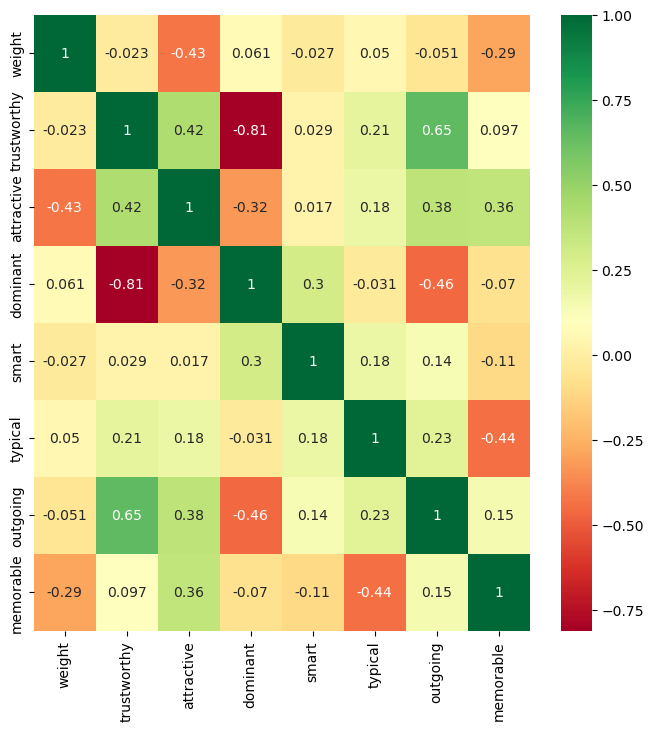

In [109]:
_, ax = plt.subplots(figsize=(8,8))
columns = ['weight', 'trustworthy', 'attractive', 'dominant', 'smart', 'typical','outgoing','memorable']
sns.heatmap(features_df_cor[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

According to the heat map:
- perceived "attractive" has a moderate negative correlation with the weight feature.
- perceived "smart" and "trustworthy" seems don't have vert strong correlation with the weight feature.




## Tree Based Model 

From the heatmap, we could tell that perceived attractiveness has a significant correlation with the weight of face. Thus, for the regressor task, I intend to train the model to predict attractiveness based on weight descriptions. 

### DT Regressor
- train and test decision tree regressor 
- visualize and interpret model performance

In [110]:
# packages for machine learning 
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import graphviz 

# packages for plot and visualization
import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz 
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
%matplotlib inline

In [111]:
# Prepare data
dt_df = pd.DataFrame(normalized_weight)
dt_df['target'] = features_df['attractive']
dt_df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,target
0,0.201823,0.207263,0.131960,0.197362,0.212057,0.232269,0.217988,0.156408,0.493629,0.284529,...,0.180764,0.286210,0.188048,0.143103,0.328061,0.477883,0.167319,0.209895,0.144598,0.371423
1,0.192696,0.278254,0.159255,0.431848,0.273513,0.182764,0.226668,0.241939,0.362119,0.237364,...,0.397425,0.191389,0.182948,0.131782,0.175761,0.141204,0.156109,0.197948,0.057804,0.581584
2,0.085817,0.297397,0.369857,0.293657,0.156337,0.120770,0.086942,0.072899,0.448529,0.220386,...,0.243063,0.064339,0.398021,0.209235,0.173963,0.184622,0.492171,0.404965,0.451193,0.203378
3,0.125014,0.196667,0.143117,0.211595,0.200402,0.220020,0.198413,0.200367,0.271753,0.216442,...,0.488544,0.166118,0.353496,0.200162,0.112506,0.499833,0.128121,0.139557,0.084880,0.673150
4,0.107033,0.237456,0.146391,0.180053,0.137951,0.463349,0.190427,0.223709,0.276507,0.517836,...,0.229401,0.148305,0.139865,0.091933,0.250129,0.143012,0.167486,0.207318,0.031485,0.437511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.144759,0.477494,0.344032,0.240149,0.230024,0.463327,0.115321,0.186502,0.157795,0.230118,...,0.242826,0.185995,0.353267,0.206623,0.298130,0.235987,0.206983,0.157350,0.193994,0.362155
1000,0.528644,0.221847,0.510796,0.305897,0.333867,0.140460,0.232044,0.192848,0.036011,0.099885,...,0.233336,0.210058,0.071936,0.180030,0.312260,0.102231,0.639237,0.368387,0.324166,0.695899
1001,0.177262,0.282005,0.202346,0.265823,0.232945,0.237618,0.099151,0.132099,0.360948,0.271536,...,0.297847,0.127397,0.187249,0.157121,0.271273,0.213745,0.182438,0.202851,0.233781,0.345145
1002,0.288197,0.404819,0.154518,0.276685,0.169326,0.198132,0.350120,0.276116,0.195870,0.283130,...,0.569898,0.123716,0.296003,0.196786,0.291416,0.067312,0.209254,0.165731,0.165571,0.742296


In [112]:
# get the input feature matrix and target variable, prepare for model fitting
X,y = dt_df.iloc[:, :-1], dt_df.target
X.shape, y.shape

((1004, 512), (1004,))

In [113]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((803, 512), (201, 512))

In [114]:
# fit the model on the training set and and evaluate the model performance on the testing set
dt_reg = DecisionTreeRegressor(criterion='squared_error', random_state=42) 
dt_reg = dt_reg.fit(X_train, y_train)
np.round(dt_reg.score(X_test,y_test),3)

-0.142

In [115]:
dt_reg.get_depth()

17

In [116]:
# tune the model
dt_reg2 = DecisionTreeRegressor(criterion='squared_error', random_state=42,max_depth=5) 
dt_reg2 = dt_reg2.fit(X_train, y_train)
np.round(dt_reg2.score(X_test,y_test),3)

0.081

#### Discussion
- I originally did not set the max_depth parameter, but the model performance was negative. To fix that, I reduce the depth maximum to be 5. Although the model performs still very bad, I correct it at least not below zero.
- Also, from the previous literatures in psychology study, my assuption here is that perceived attractiveness and weight should have a linear negative correlation. However, decision trees naturally might not perform so well since they are non-linear models.
- I suspect the bad performance of this model could due to underfitting. Since the original data describing weight are relative to position of image, it could not be so imformative as numeric data, which could result in the model underfitting.

In [117]:
# Visualize the fitted DecisionTreeRegressor
dot_data_reg = tree.export_graphviz(dt_reg, out_file=None, 
                                #feature_names=dt_df.feature_names, 
                                class_names=dt_df.target,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data_reg)  
graph 

### Random Forest Regressor
- train and test randomforest regressor
- visualize and interpret model performance

In [118]:
# import additional packages
from sklearn.ensemble import RandomForestRegressor

In [119]:
# split the data into training and testing set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train_rf.shape, X_test_rf.shape

((803, 512), (201, 512))

In [120]:
# fit the model on the training set
dt_random = RandomForestRegressor(criterion = 'squared_error', random_state = 42, max_depth = 10)
dt_random = dt_random.fit(X_train_rf, y_train_rf)

In [121]:
# evaluate the random forest classifier on test set 
np.round(dt_random.score(X_test_rf,y_test_rf),3)

0.468

#### Discussion
The random forest model large enhanced the model performance, especially after I set the parameter of max_depth. However, for each time I try to set the random forest model, it took much longer to run the code, which indicates that random forest model tend to consume more computations compared to individual decision tree. Also, it is hard for me to see the visualization of the model. 

### My Own Exploration
For this part, I would want to expriment on if the tree based model can predict perceived weight score based on other perceived attributes.

In [122]:
features_df_exp = pd.read_csv('./attribute_means.csv') 
features_df_exp

,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,happy,...,hispanic,islander,native,black,white,looks-like-you,gay,electable,godly,outdoors
0,1,43.673077,46.552632,79.771429,55.405405,50.404255,86.891892,38.119048,66.736842,18.970588,...,18.828571,12.470588,13.925926,5.105263,92.970588,31.428571,20.523810,61.486486,53.439024,83.925000
1,2,65.000000,59.750000,48.666667,57.891892,31.300000,12.560976,48.275000,49.209302,75.771429,...,70.325000,63.236842,54.564516,72.735294,4.880952,13.465116,31.414634,66.184211,62.809524,57.513514
2,3,37.010526,36.000000,65.428571,65.057143,51.745098,74.789474,44.790698,48.666667,23.135135,...,44.375000,27.108108,33.898305,3.972222,68.787879,18.363636,46.024390,70.804878,55.921053,11.292683
3,4,64.053191,65.500000,47.194444,54.700000,24.777778,9.526316,32.375000,44.024390,59.526316,...,61.666667,60.352941,49.824561,72.552632,3.315789,10.500000,20.365854,57.179487,62.051282,16.560976
4,5,69.577320,50.702703,56.257143,61.527778,44.534884,14.650000,40.250000,70.184211,82.600000,...,14.162162,15.121212,10.910714,3.702703,88.842105,19.000000,21.783784,70.888889,71.833333,20.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1000,51.678161,45.970588,59.171429,51.925000,40.142857,86.257143,53.235294,73.714286,53.647059,...,44.146341,15.228571,19.256410,6.647059,81.857143,26.371429,29.055556,57.975000,60.757576,14.923077
1000,1001,76.918605,66.928571,37.105263,53.864865,16.294118,11.200000,44.138889,57.228571,76.714286,...,51.600000,57.738095,45.717949,10.289474,58.500000,23.085714,18.783784,27.243902,68.800000,87.636364
1001,1002,50.318182,44.902439,63.578947,64.736842,37.969697,82.297297,51.333333,52.891892,34.450000,...,58.121212,77.078947,60.200000,18.500000,13.351351,16.515152,24.378378,63.871795,49.900000,12.914286
1002,1003,55.551724,69.842105,54.625000,48.250000,26.029412,8.307692,41.358974,54.085714,41.538462,...,68.000000,51.944444,44.375000,11.685714,47.027027,22.230769,25.400000,56.852941,63.435897,17.714286


In [123]:
# create the MinMaxScaler object
scaler = MinMaxScaler()

# loop through each column and scale
for column in features_df_exp.columns:
    features_df_exp[column] = scaler.fit_transform(features_df_exp[[column]])
    
features_df_exp

,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,happy,...,hispanic,islander,native,black,white,looks-like-you,gay,electable,godly,outdoors
0,0.000000,0.333202,0.371423,1.000000,0.552224,0.722473,0.907773,0.335032,0.712658,0.144245,...,0.192335,0.116782,0.153042,0.047506,0.944823,0.798099,0.147891,0.718118,0.449979,0.851612
1,0.000997,0.674584,0.581584,0.584134,0.597025,0.443361,0.101535,0.478237,0.369769,0.802716,...,0.788181,0.709823,0.651554,0.738336,0.043137,0.286142,0.296364,0.774561,0.627974,0.570464
2,0.001994,0.226554,0.203378,0.808238,0.726128,0.742063,0.776503,0.429107,0.359154,0.192523,...,0.487923,0.287774,0.398043,0.035932,0.697288,0.425750,0.495537,0.830078,0.497126,0.078449
3,0.002991,0.659428,0.673150,0.564451,0.539514,0.348072,0.068619,0.254037,0.268338,0.614392,...,0.687999,0.676134,0.593409,0.736470,0.027116,0.201637,0.145738,0.666369,0.613571,0.134529
4,0.003988,0.747853,0.437511,0.685618,0.662536,0.636722,0.124194,0.365080,0.780098,0.881877,...,0.138342,0.147746,0.116054,0.033179,0.902563,0.443886,0.165068,0.831088,0.799383,0.179416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.996012,0.461340,0.362155,0.724581,0.489514,0.572555,0.900888,0.548181,0.849156,0.546236,...,0.485278,0.149000,0.218431,0.063256,0.831065,0.653971,0.264203,0.675927,0.588997,0.117094
1000,0.997009,0.865365,0.695899,0.429560,0.524467,0.224126,0.086773,0.419916,0.526649,0.813646,...,0.571521,0.645588,0.543034,0.100462,0.591982,0.560329,0.124170,0.306694,0.741765,0.891119
1001,0.998006,0.439571,0.345145,0.783509,0.720357,0.540805,0.857937,0.521362,0.441811,0.323692,...,0.646976,0.871524,0.720685,0.184331,0.129840,0.373068,0.200440,0.746777,0.382754,0.095710
1002,0.999003,0.523344,0.742296,0.663796,0.423299,0.366358,0.055401,0.380717,0.465166,0.405866,...,0.761280,0.577908,0.526560,0.114725,0.474544,0.535963,0.214368,0.662446,0.639872,0.146806


In [124]:
# prepare data: y
y_exp = features_df_exp.weight
y_exp.shape

(1004,)

In [125]:
# prepare data: X
X_exp =  pd.DataFrame(features_df_exp.drop(columns=['weight']))
X_exp.shape

(1004, 34)

In [126]:
# split the data into training and testing set
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)
X_train_exp.shape, X_test_exp.shape

((803, 34), (201, 34))

In [127]:
# fit the model on the training set and and evaluate the model performance on the testing set
dt_reg_exp = DecisionTreeRegressor(criterion='squared_error', random_state=42, max_depth=5) 
dt_reg_exp = dt_reg_exp.fit(X_train_exp, y_train_exp)
np.round(dt_reg_exp.score(X_test_exp,y_test_exp),3)

0.127

#### Discussion
Since many established literatures in psychology have shown strong correlation between perceived weight and perceived attractiveness, I image the performance score for this part would be high. However, the performance score is still very minimum, even after I control for the max_depth. Thus, I think tree based model may not be my best choice in predicting variables with linear relationships